In [40]:
from chrr import CHRR
%matplotlib inline 

CHRR.reset_kernel()
CHRR.verbose = True

a = CHRR("a")
b = CHRR("b")
c = CHRR("c")
d = CHRR("d")

p1 = CHRR("1")
p2 = CHRR("2")
p3 = CHRR("3")
p4 = CHRR("4")
p5 = CHRR("5")
p6 = CHRR("6")
p7 = CHRR("7")
p8 = CHRR("8")
p9 = CHRR("9")
p0 = CHRR("0")

m1 = p7 * a + p5 * b + p3 * c + p1 * d
m2 = p4 * a + p8 * b + p2 * c + p6 * d
m3 = p0 * a + p1 * b + p2 * c + p3 * d

ms1 = p7 * a + p5 * b 
ms2 = p4 * a + p8 * b 
ms3 = p0 * a + p1 * b 

t = ms1 % m1 + ms2 % m2 + ms3 % m3

mt = p6 * a + p3 * b + p7 * c + p6 * d

mt = mt * t

print(mt/a)
print(mt/b)
print(mt/c)
print(mt/d)


Distance from a is 0.0339636038136
Distance from c is 0.0479417376144
Distance from b is -0.0232160899446
Distance from d is 0.019838136081
Distance from 1 is -0.00997945683221
Distance from 0 is 0.0289698724065
Distance from 3 is 0.00985113178716
Distance from 2 is -0.0324839586789
Distance from 5 is -0.0358419362413
Distance from 4 is 0.110173039536
Distance from 7 is 0.00138825431035
Distance from 6 is 0.155582276442
Distance from 9 is 0.020408792798
Distance from 8 is -0.0250370393436
6
Distance from a is -0.0232160899446
Distance from c is 0.0108397760315
Distance from b is -0.0174545642979
Distance from d is 0.0143775124203
Distance from 1 is 0.0197670875051
Distance from 0 is 0.013455328156
Distance from 3 is 0.118992376388
Distance from 2 is -0.0068115622641
Distance from 5 is 0.00907337265951
Distance from 4 is -0.0347645256126
Distance from 7 is 0.00584156923637
Distance from 6 is 0.0780068864775
Distance from 9 is -0.0368449166347
Distance from 8 is 0.0619861342676
3
Distanc

running
(128, 0, 1.0)
(256, 0, 1.0)
(512, 0, 1.0)
(1024, 0, 1.0)
(2048, 0, 1.0)
(128, 1, 1.0)
(256, 1, 1.0)
(512, 1, 1.0)
(1024, 1, 1.0)
(2048, 1, 1.0)
(128, 2, 1.0)
(256, 2, 1.0)
(512, 2, 1.0)
(1024, 2, 1.0)
(2048, 2, 1.0)
(128, 3, 0.44444444444444442)
(256, 3, 0.44444444444444442)
(512, 3, 0.44444444444444442)
(1024, 3, 0.44444444444444442)
(2048, 3, 0.44444444444444442)
(128, 4, 0.375)
(256, 4, 0.375)
(512, 4, 0.375)
(1024, 4, 0.375)
(2048, 4, 0.375)
(128, 5, 0.33333333333333337)
(256, 5, 0.33333333333333337)
(512, 5, 0.33333333333333337)
(1024, 5, 0.33333333333333337)
(2048, 5, 0.33333333333333337)
(128, 6, 0.30555555555555558)
(256, 6, 0.30555555555555558)
(512, 6, 0.30555555555555558)
(1024, 6, 0.30555555555555558)
(2048, 6, 0.30555555555555558)
(128, 7, 0.2857142857142857)
(256, 7, 0.2857142857142857)
(512, 7, 0.2857142857142857)
(1024, 7, 0.2857142857142857)
(2048, 7, 0.2857142857142857)
(128, 8, 0.27083333333333337)
(256, 8, 0.27083333333333337)
(512, 8, 0.27083333333333337)
(

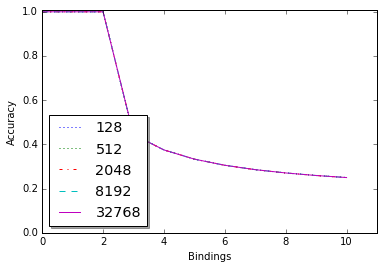

In [1]:
import numpy as np
import random
import string
import pickle
from chrr import CHRR
%matplotlib inline 
import legend

CHRR.reset_kernel()
CHRR.return_list = True

it = 5
steps = 5
maxb = 10
first_size = 128
results = np.empty((steps,maxb+1), dtype=float)
for i in range(steps):
    results[i][0] = 1;

print("running")

for bindings in range(maxb):
    CHRR.set_size(first_size)
    for step in range(steps):

        miss = 0
        
        for iterate in range(it):
            

            x = np.empty((bindings,2), dtype='|S20')
            for i in range (bindings):
                for j in range(2):
                    x[i][j] = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(10))

            m = None       
            for i in range(bindings):
                if m is None:
                    m = CHRR(x[i][0]) * x[i][1]
                else:
                    new_item = CHRR(x[i][0]) * x[i][1]
                    m += new_item   
                    
            for i in range(bindings):
                fault = False
                for e in m / x[i][0]:
                    if (e[0] == x[i][1]):
                        if (e[1] < CHRR.distance_threshold):
                            fault = True
                    elif(e[1] >= CHRR.distance_threshold):
                        fault = True
                if fault:
                    miss += 1

        results[step][bindings+1] = 1.0 - (float(miss) / ((it + 1) * (bindings + 1)))
        print(CHRR.size,bindings,results[step][bindings])
        CHRR.reset_kernel()
        CHRR.set_size(CHRR.size*2)
        
legend.getLegend(results,first_size)